# Imports

In [1]:
# Some common data manipulation imports
import numpy as np
import pandas as pd

#some other imports: Visual imports
import os

# For stable output on each run
np.random.seed(3)

# To plot easily visible pictures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Dataset csv import

In [2]:
#imports to load and modify text files, dataframes
import pandas as pd
#settig this option to see the entire results of a dataframe
pd.set_option('display.max_rows', 100000)
#loading training, testing data; renaming the column names
# def load_data():
#     train = pd.read_csv('KDDTrain+.txt', sep=",", header=None)
#     train = rename_column(train)
#     test = pd.read_csv('KDDTest+.txt', sep=",", header=None)
#     test = rename_column(test)
#     return train, test
#train, test = load_data()
from sklearn.model_selection import train_test_split

small = pd.read_csv('100_nodes.csv')
medium = pd.read_csv('200_nodes.csv')
large = pd.read_csv('500_nodes.csv')

In [3]:
pd.options.display.max_columns = 10000
small.info(verbose = True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109500 entries, 0 to 109499
Data columns (total 155 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   date                     object
 1   name                     int64 
 2   manufacture_discontinue  int64 
 3   power_supply_rf          int64 
 4   cpu_rf                   int64 
 5   memory_rf                int64 
 6   location_rf              int64 
 7   mis_config_rf            int64 
 8   os_upgrade_rf            int64 
 9   avg_link_rf              int64 
 10  card0_rf                 int64 
 11  card1_rf                 int64 
 12  card2_rf                 int64 
 13  card3_rf                 int64 
 14  card4_rf                 int64 
 15  card5_rf                 int64 
 16  card6_rf                 int64 
 17  card7_rf                 int64 
 18  card8_rf                 int64 
 19  card9_rf                 int64 
 20  card10_rf                int64 
 21  card11_rf                int64 


In [4]:
medium.info(verbose = True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 155 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   date                     object
 1   name                     int64 
 2   manufacture_discontinue  int64 
 3   power_supply_rf          int64 
 4   cpu_rf                   int64 
 5   memory_rf                int64 
 6   location_rf              int64 
 7   mis_config_rf            int64 
 8   os_upgrade_rf            int64 
 9   avg_link_rf              int64 
 10  card0_rf                 int64 
 11  card1_rf                 int64 
 12  card2_rf                 int64 
 13  card3_rf                 int64 
 14  card4_rf                 int64 
 15  card5_rf                 int64 
 16  card6_rf                 int64 
 17  card7_rf                 int64 
 18  card8_rf                 int64 
 19  card9_rf                 int64 
 20  card10_rf                int64 
 21  card11_rf                int64 


In [5]:
large.info(verbose = True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547500 entries, 0 to 547499
Data columns (total 155 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   date                     object
 1   name                     int64 
 2   manufacture_discontinue  int64 
 3   power_supply_rf          int64 
 4   cpu_rf                   int64 
 5   memory_rf                int64 
 6   location_rf              int64 
 7   mis_config_rf            int64 
 8   os_upgrade_rf            int64 
 9   avg_link_rf              int64 
 10  card0_rf                 int64 
 11  card1_rf                 int64 
 12  card2_rf                 int64 
 13  card3_rf                 int64 
 14  card4_rf                 int64 
 15  card5_rf                 int64 
 16  card6_rf                 int64 
 17  card7_rf                 int64 
 18  card8_rf                 int64 
 19  card9_rf                 int64 
 20  card10_rf                int64 
 21  card11_rf                int64 


In [6]:
def condense(original):
    c_original = original
    new_col = original.iloc[:, 26:154].mean(axis = 1)
    c_original['Avg_port_rf'] = np.round(np.ceil(new_col)).astype(int)
    new_col_min = original.iloc[:, 10:26].min(axis = 1)
    c_original['Avg_card_rf'] = new_col_min
    c_original = c_original[['manufacture_discontinue', 'power_supply_rf', 
                                 'cpu_rf', 'memory_rf', 'location_rf', 'mis_config_rf', 'os_upgrade_rf',
                                 'avg_link_rf', 'Avg_port_rf', 'Avg_card_rf','target']]
#     c_original.drop(columns = ['date'], axis = 1, inplace = True)
    return c_original

In [7]:
c_small = condense(small)
c_medium = condense(medium)
c_large = condense(large)

In [8]:
print("\nSmall: ")
print(c_small.describe())
print("\n\nMedium: ")
print(c_medium.describe())
print("\n\nLarge: ")
print(c_large.describe())


Small: 
       manufacture_discontinue  power_supply_rf         cpu_rf      memory_rf  \
count            109500.000000     109500.00000  109500.000000  109500.000000   
mean                 45.828457          5.20000       7.108055       6.230548   
std                  15.035229          2.82136       0.525442       0.555168   
min                   0.000000          0.00000       6.000000       5.000000   
25%                  35.000000          3.00000       7.000000       6.000000   
50%                  50.000000          5.00000       7.000000       6.000000   
75%                  60.000000          7.25000       7.000000       7.000000   
max                  60.000000         10.00000       8.000000       8.000000   

         location_rf  mis_config_rf  os_upgrade_rf    avg_link_rf  \
count  109500.000000  109500.000000  109500.000000  109500.000000   
mean        4.730000       4.630000       5.270000       5.400000   
std         3.337245       3.348612       3.065483    

In [9]:
column_name = ["Manufactured Discontinued", "Power Supply Risk Factor", "CPU Risk Factor", "Memory Risk Factor",
               "Location Risk Factor", "Mis-configuration Risk Factor", "OS Risk Factor", "Average Link Risk Factor",
              "Average Port Risk Factor", "Average Card Risk Factor", "Failure Categories"]
failure_categoris = ["No Failure", "CPU Failure", "Memory Failure", "Card Failure", "Port Failure",
                     "Power Supply Failure", "Natural Disasters", "OS Failure", "Mis-configuration", "Link Failure"]

In [10]:
def addlabels(x,y):
    counter = 0
    for i in x:
        plt.text(i, y[counter] + 300, y[counter], ha = 'center')
        counter = counter + 1
        
def bar_plot(df1, c, filename, yt, yt_o):
    counter = 1
    for column in df1:
        if column == 'manufacture_discontinue':
            continue
        style.use('classic')
        plt.figure(figsize = (10,7))
        barwidth = 0.3
        xpos = df1[column].value_counts().index.tolist()
        
        plt.bar(xpos, list(df1[column].value_counts()), color = c,
                width = barwidth, label = column_name[counter])
        
        plt.xticks(df1[column].value_counts().index.tolist())
        plt.xlabel(column_name[counter])
        
        values = np.arange(0, max(list(df1[column].value_counts())) + (max(list(df1[column].value_counts()))/yt_o), yt)
        plt.yticks(values, ['%d' % val for val in values])
        plt.ylabel("Value Count")
        
#         for index, data in enumerate(list(df1[column].value_counts())):
#             plt.text(x = index, y = data + 29, s = f"{data}")
#             print(index)
#             print(data)
        plt.tight_layout()
        plt.legend(loc = 'best')
        
#         ax.bar_label(ax.containers[0], label_type='edge')
        
        addlabels(xpos, list(df1[column].value_counts()))
        
        filename_t = filename + column_name[counter] + str(counter) + ".png"
        #plt.savefig(filename_t)
        counter = counter + 1
#         df1[column].value_counts().plot(kind = 'bar')

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


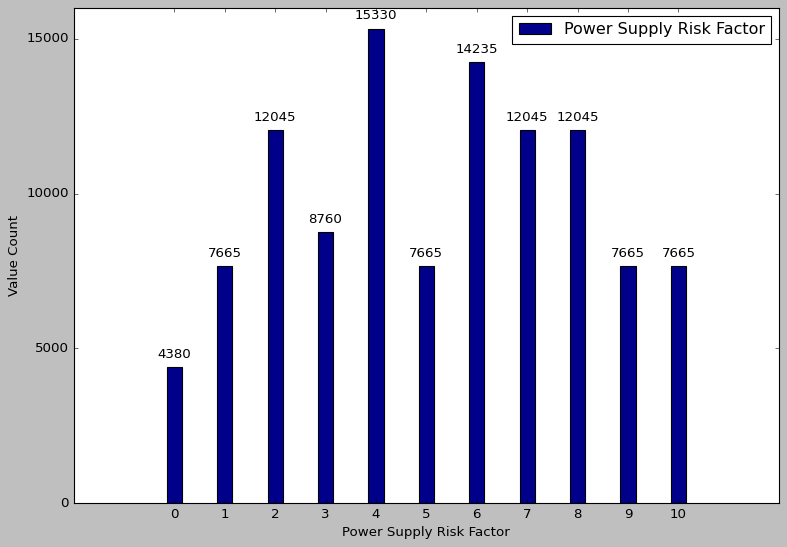

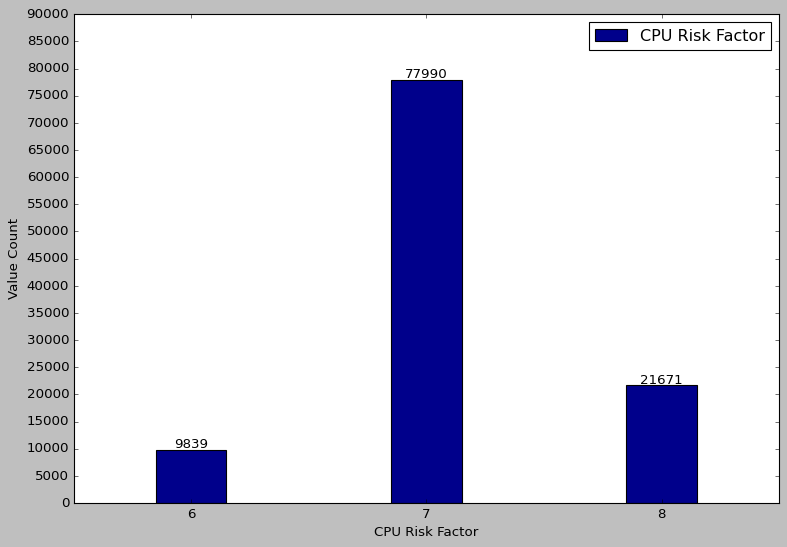

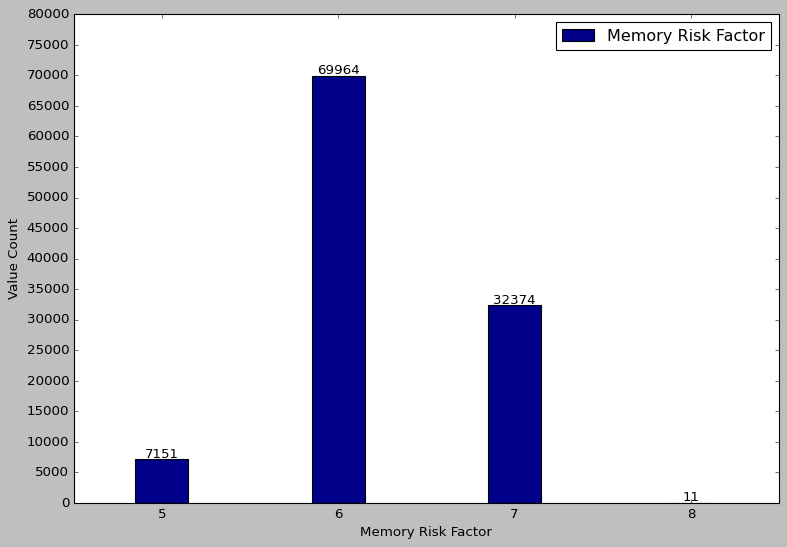

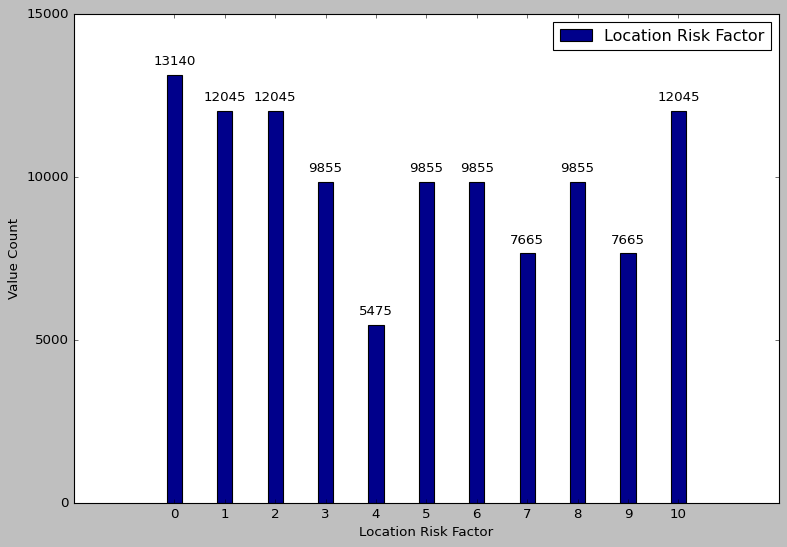

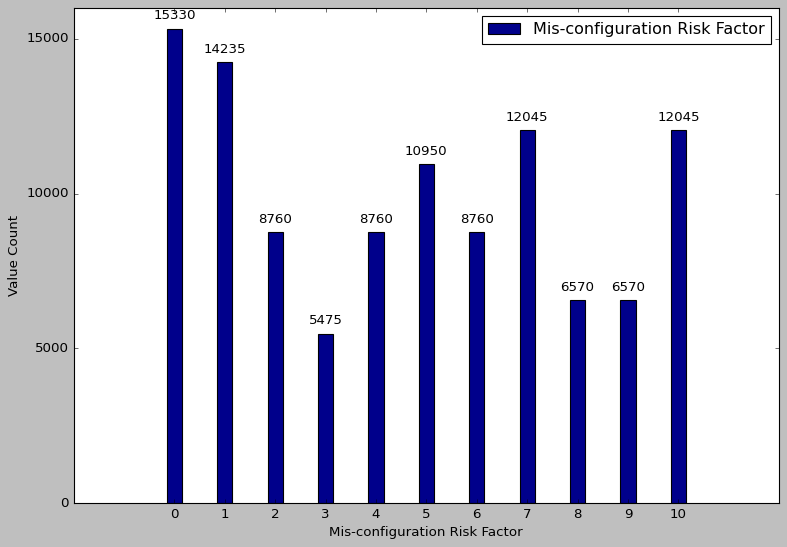

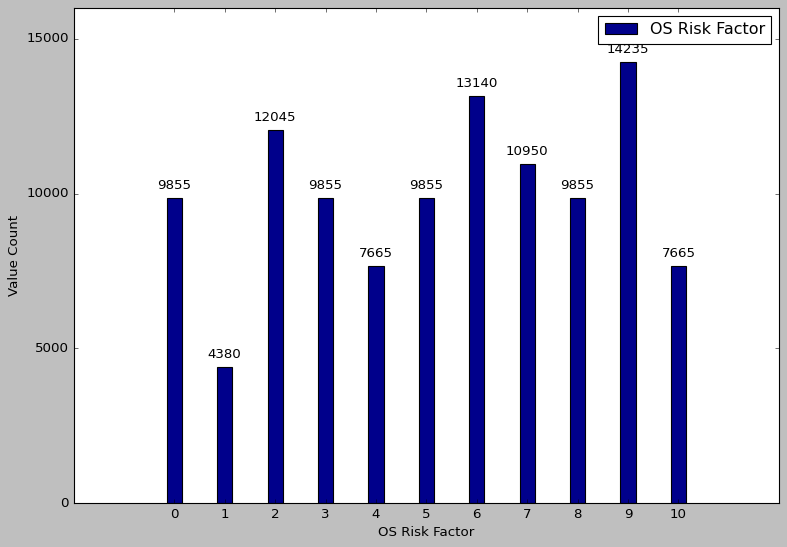

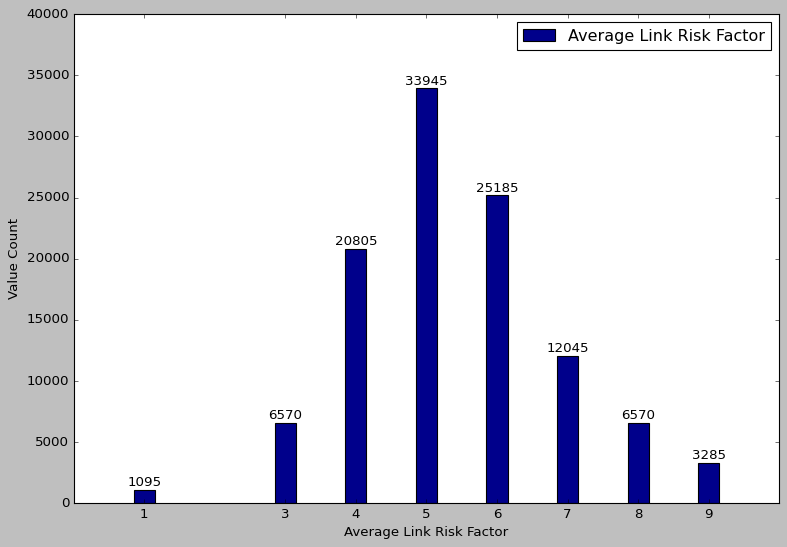

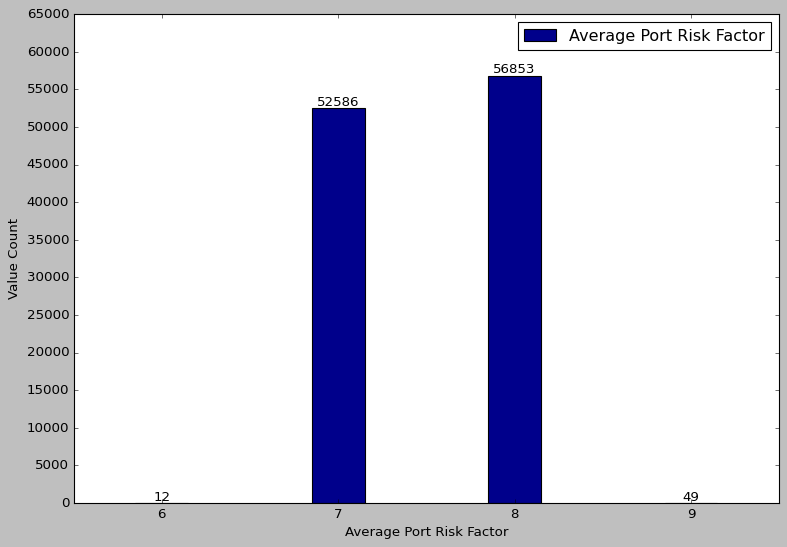

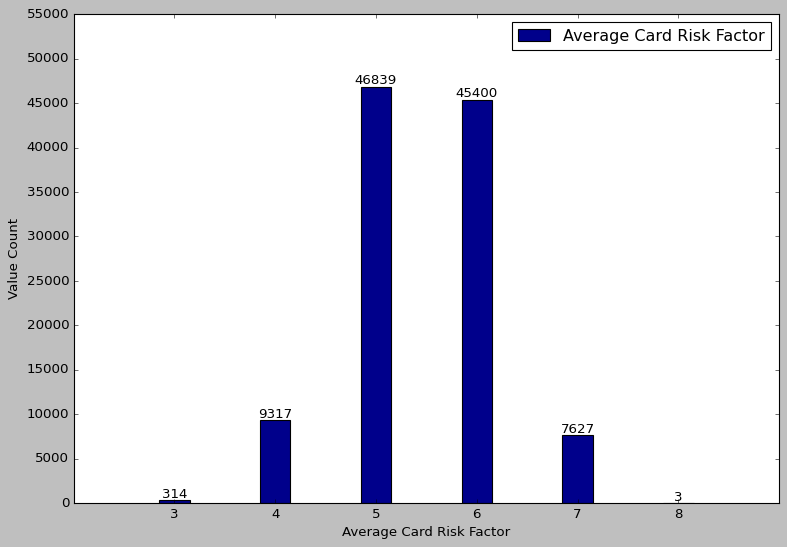

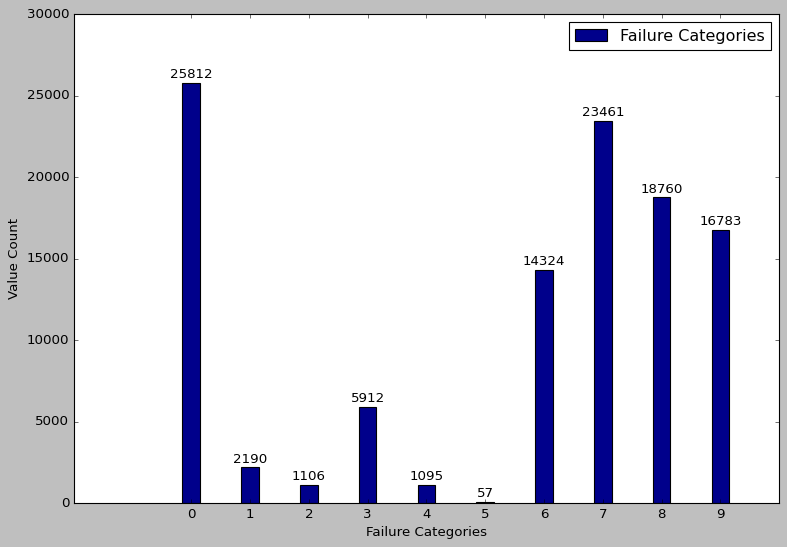

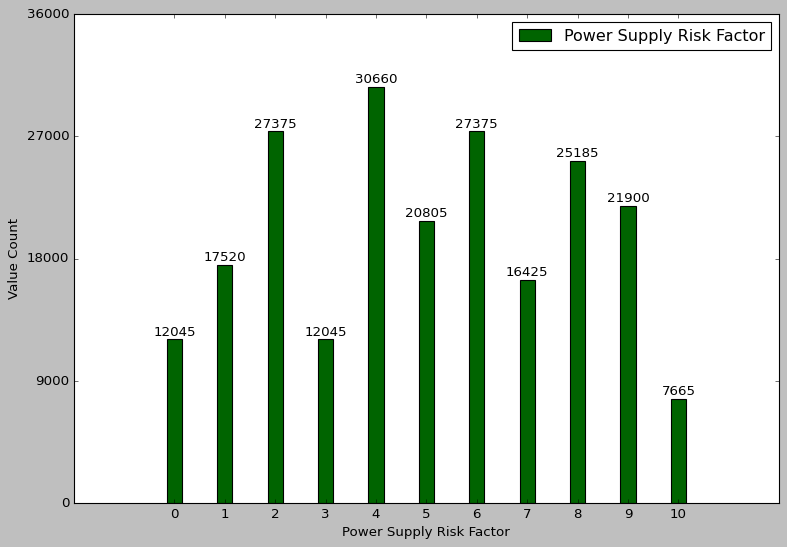

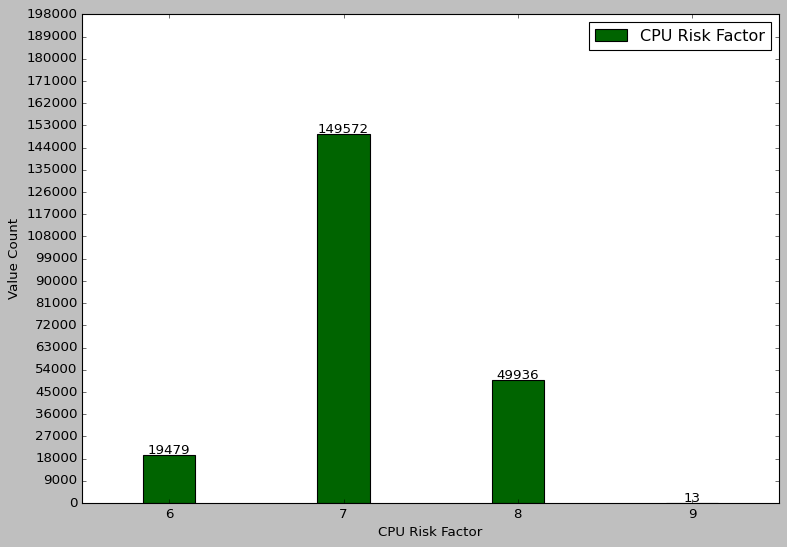

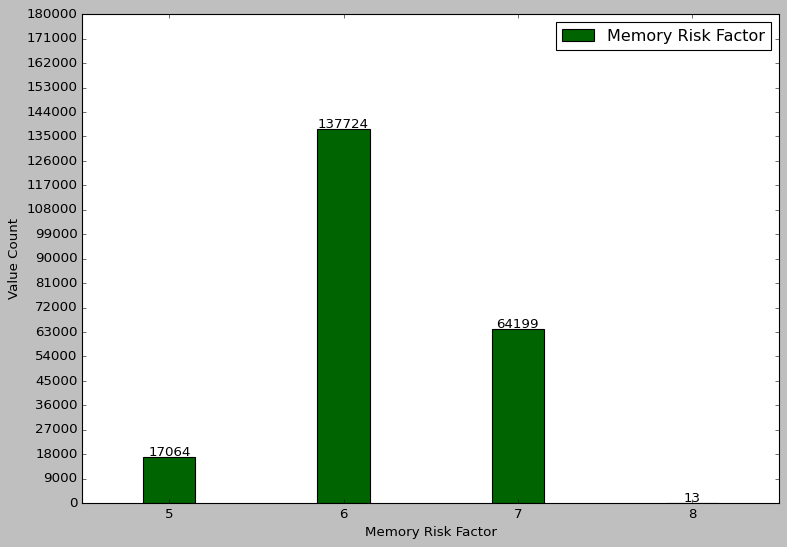

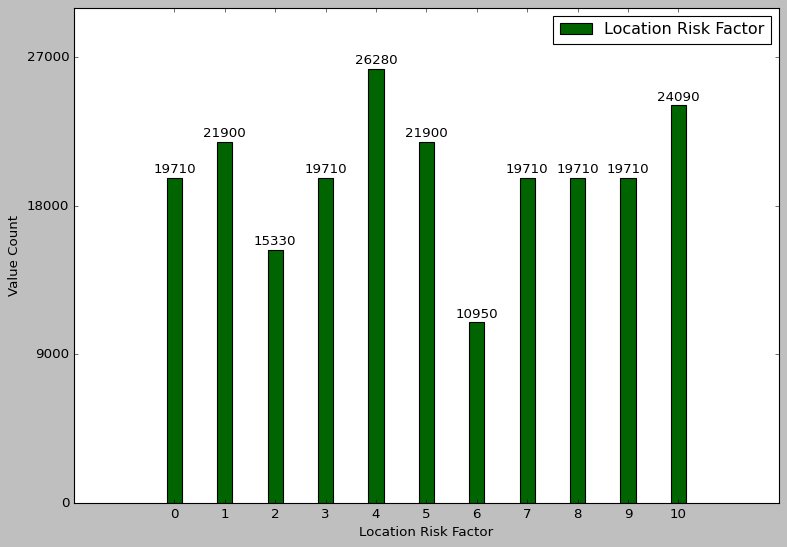

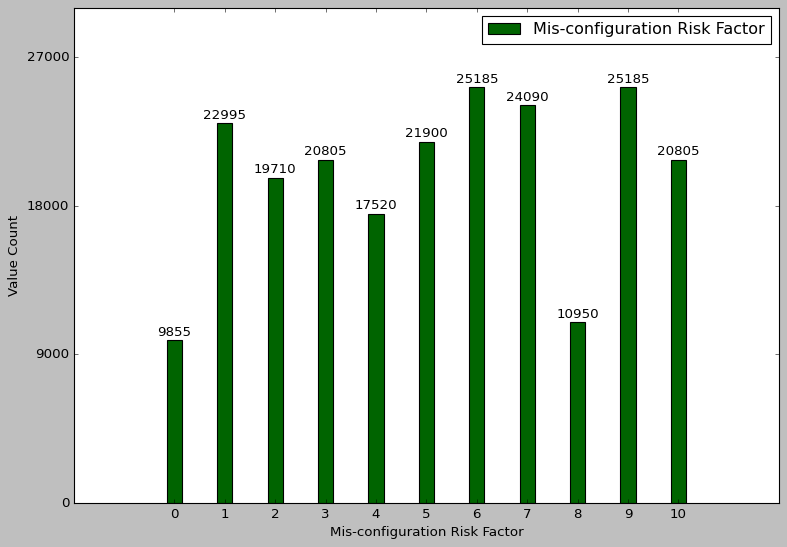

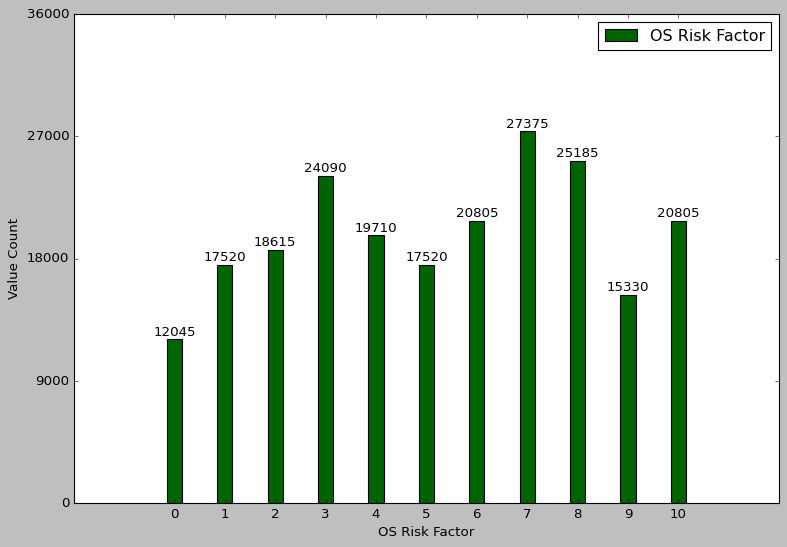

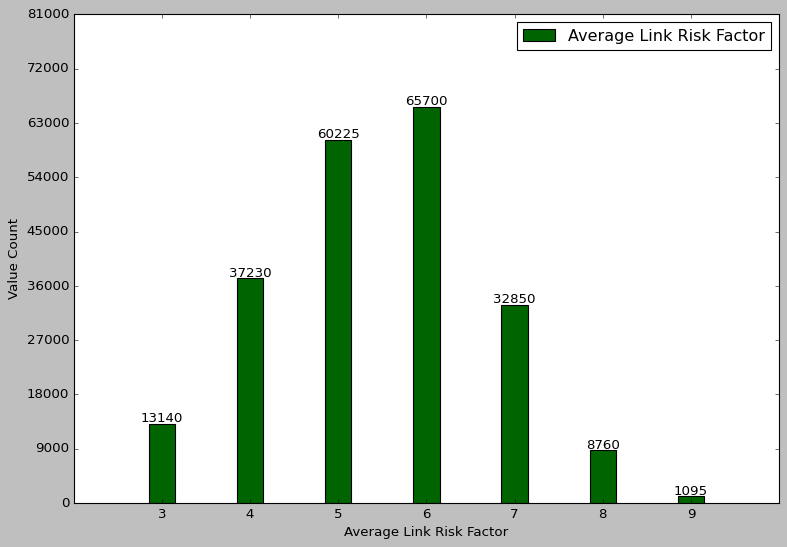

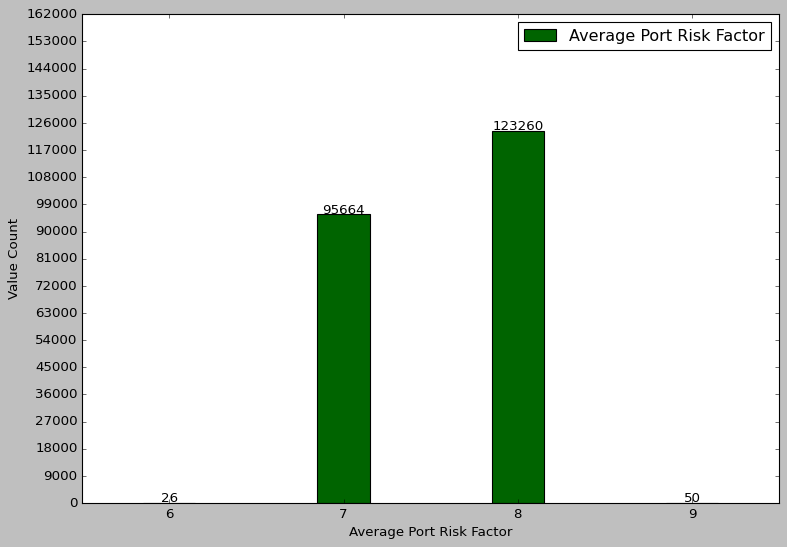

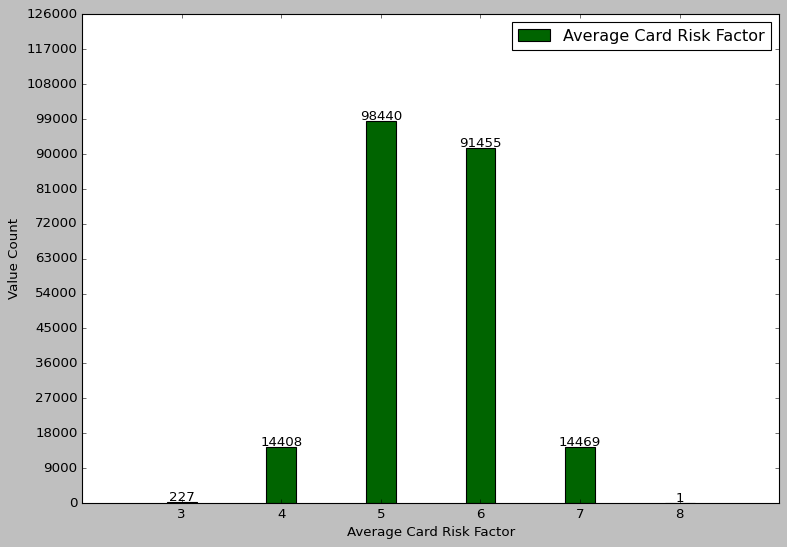

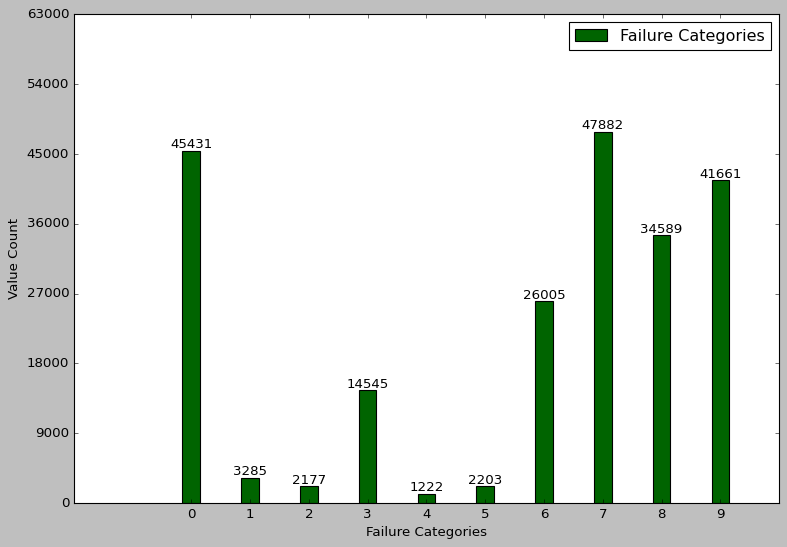

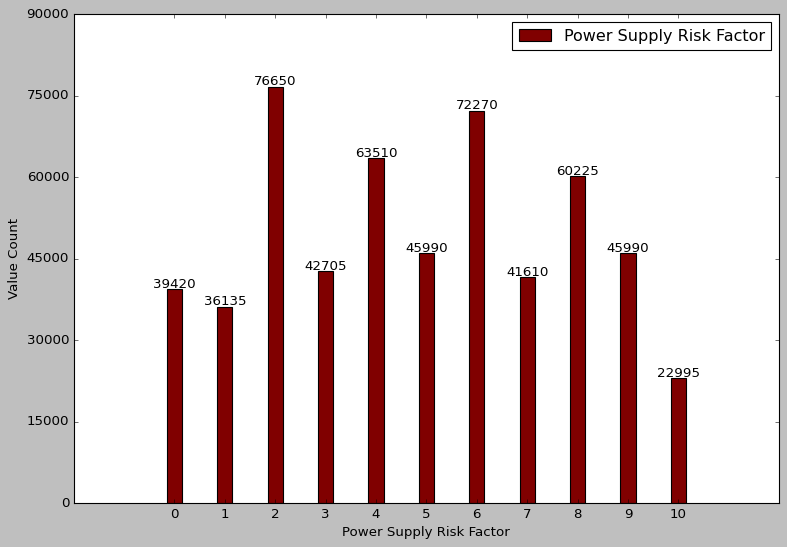

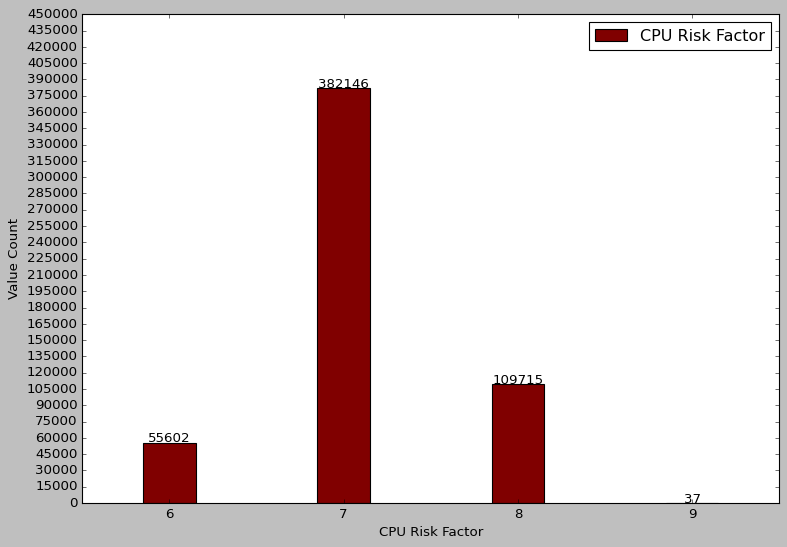

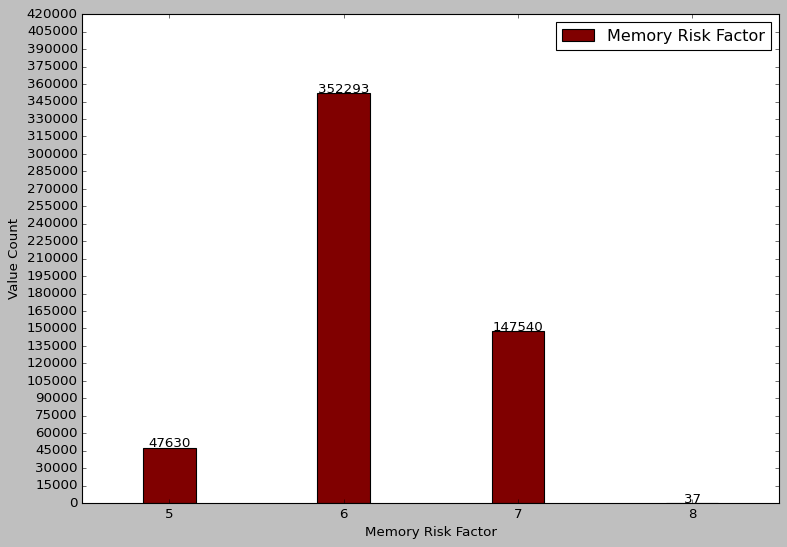

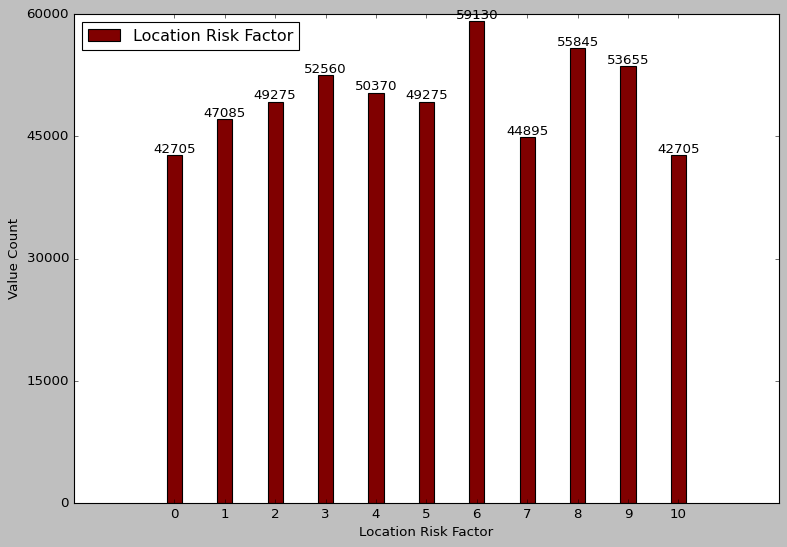

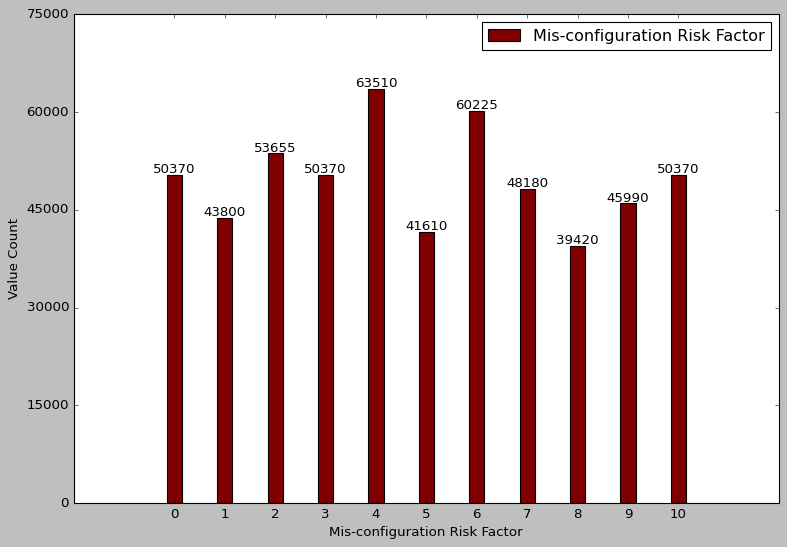

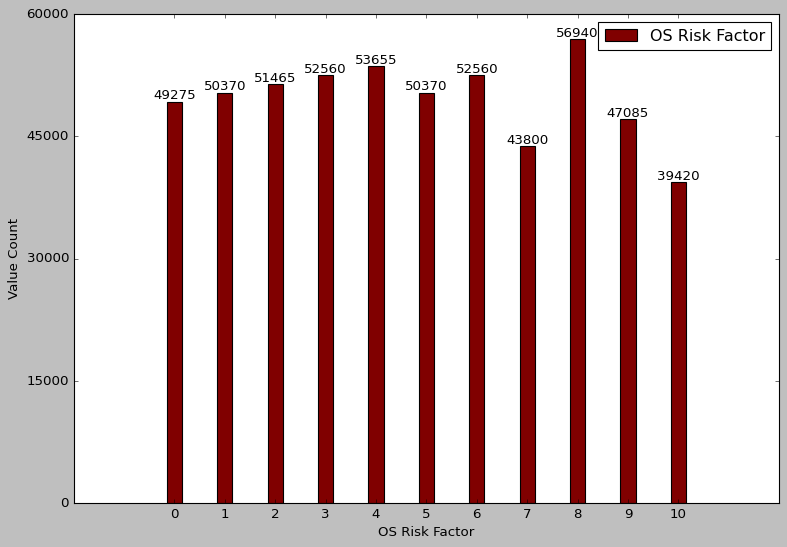

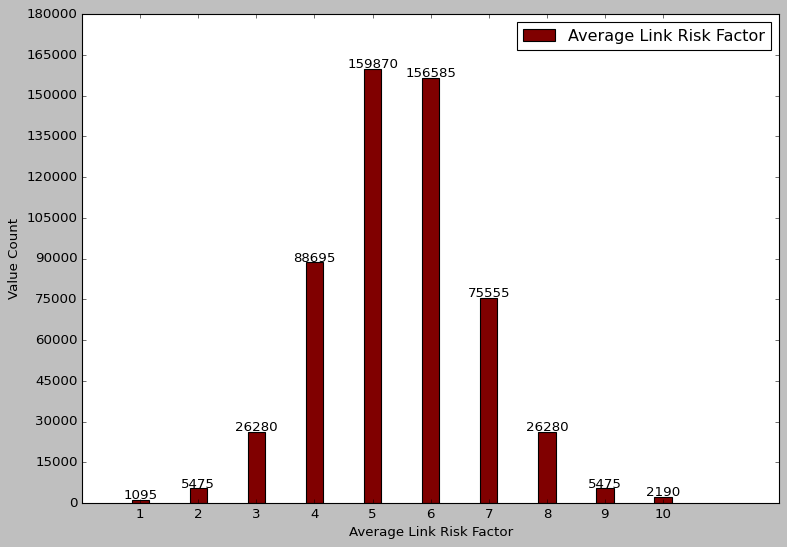

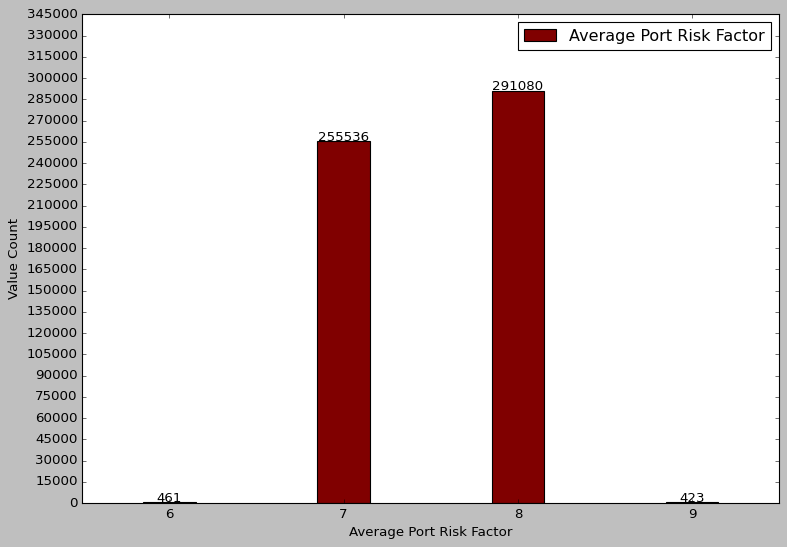

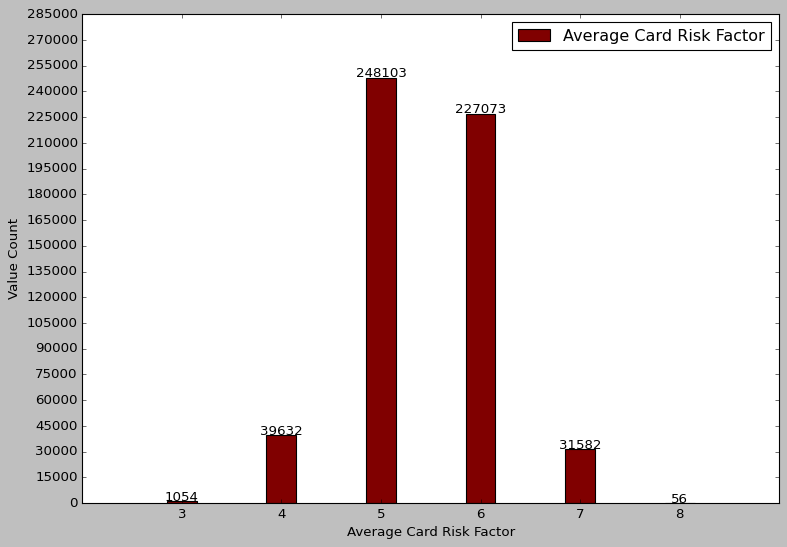

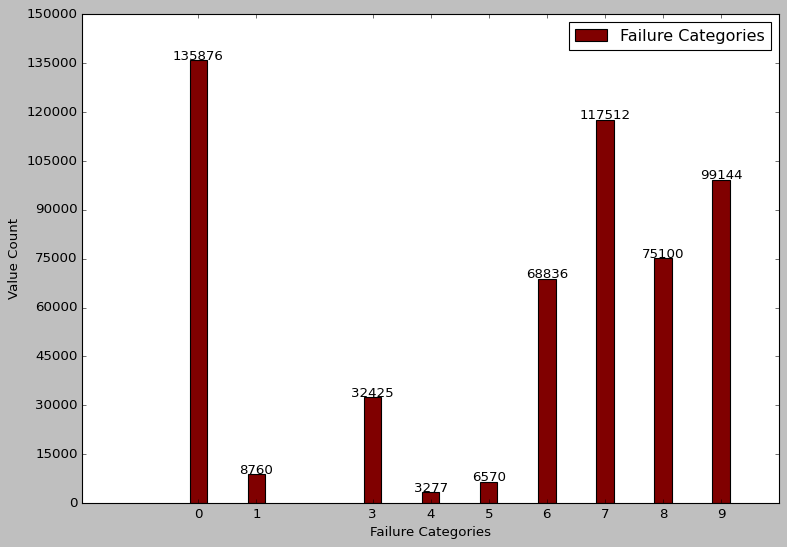

In [11]:
bar_plot(c_small, 'darkblue', 'small', 5000, 5)
bar_plot(c_medium, 'darkgreen', 'medium', 9000, 2.8)
bar_plot(c_large, 'maroon', 'large', 15000, 5)

In [12]:
def plot_violine(df, c, filename):
    counter = 0
    
    for column in df:
        
        style.use('classic')
        plt.figure(figsize = (10,7))
        sns.violinplot(x = df[column], color = c)
        
        plt.xlabel(column_name[counter])
        
        
        filename_t = filename + column_name[counter] + str(counter) + ".png"
        #plt.savefig(filename_t)
        counter = counter + 1

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


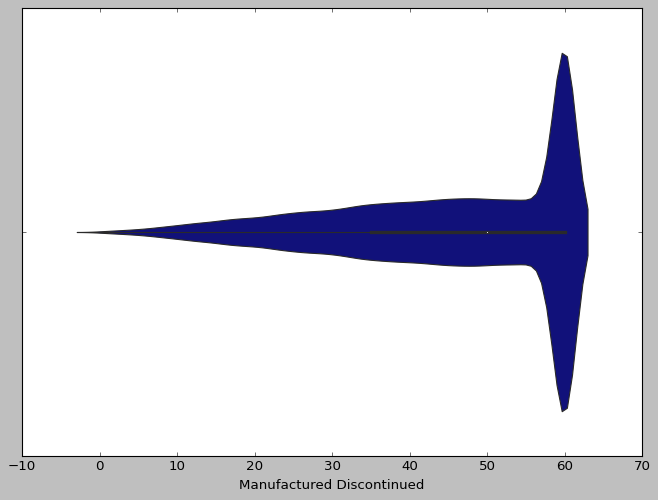

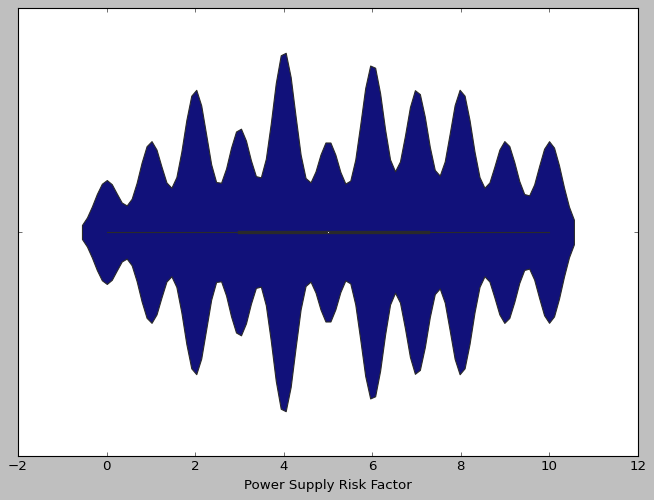

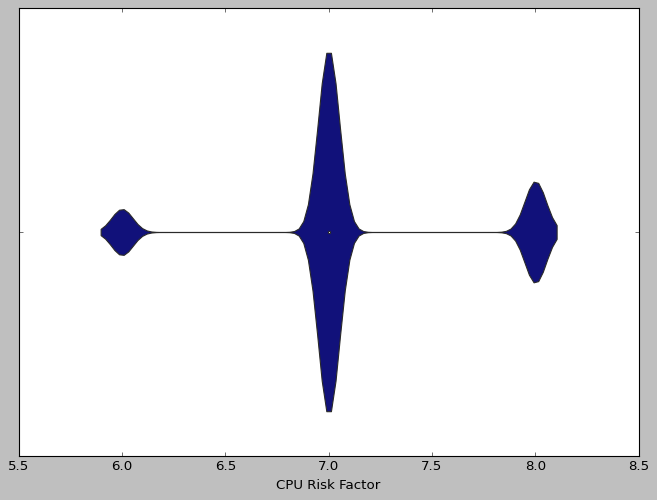

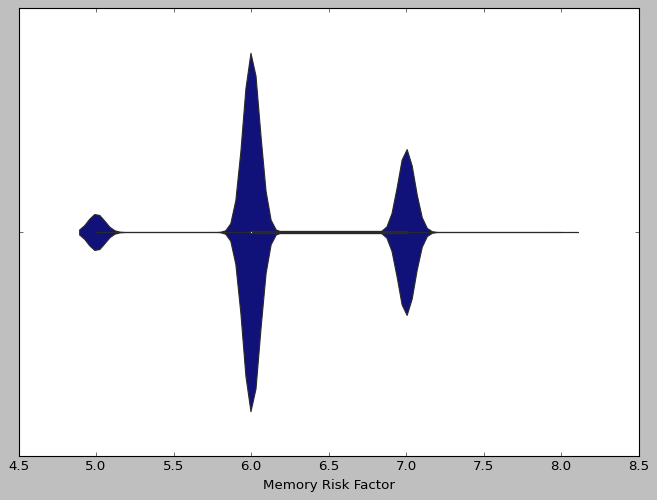

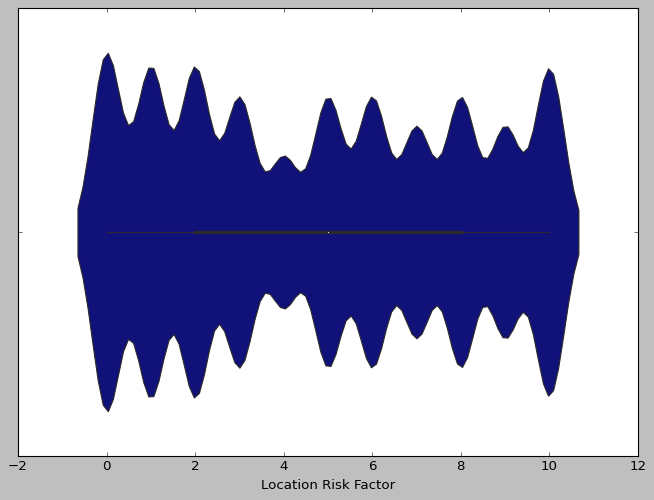

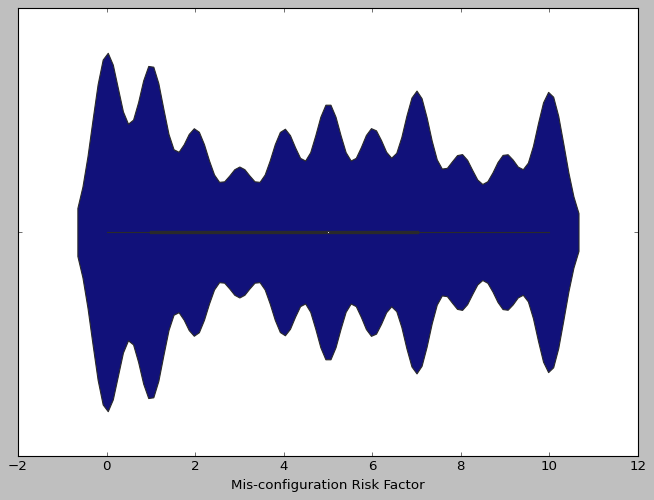

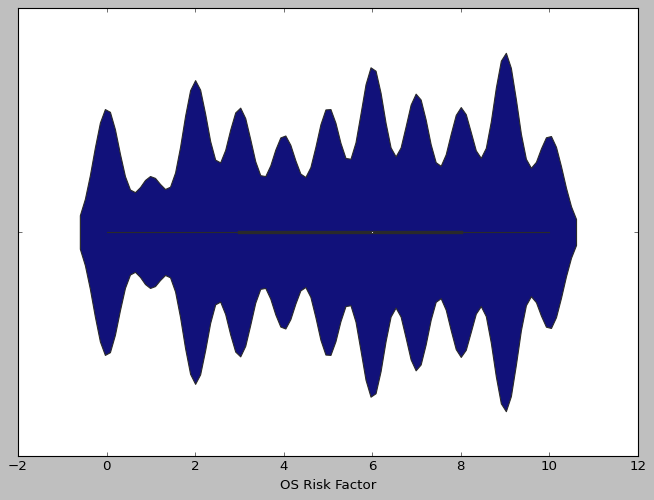

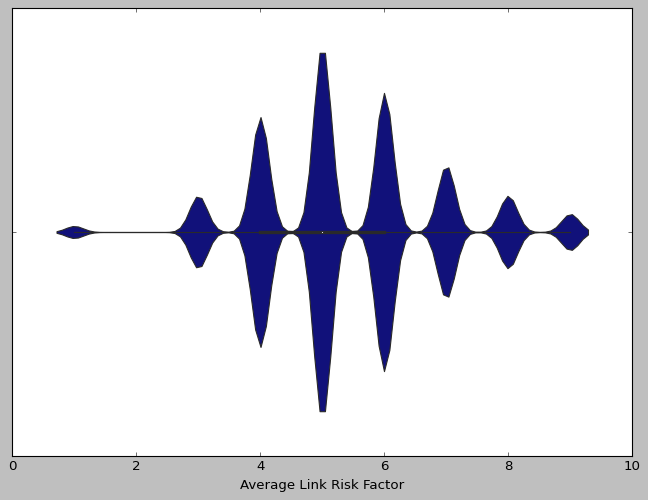

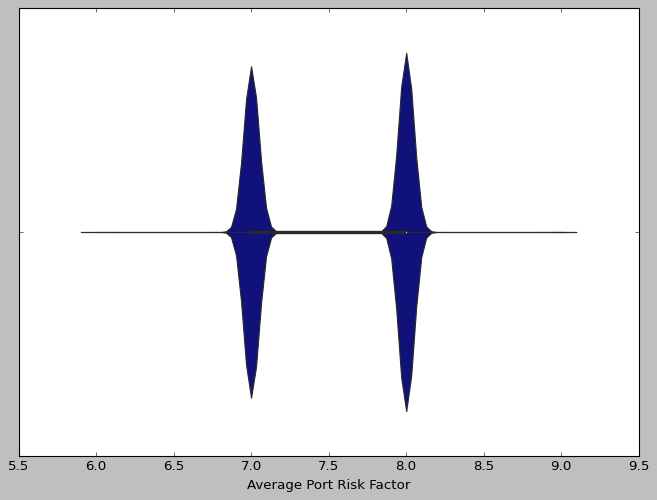

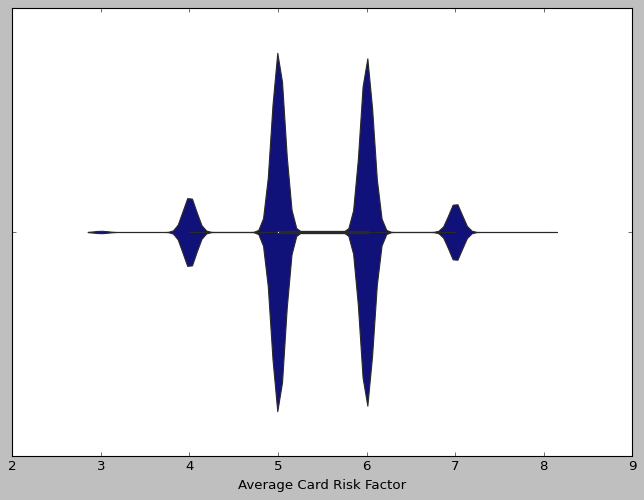

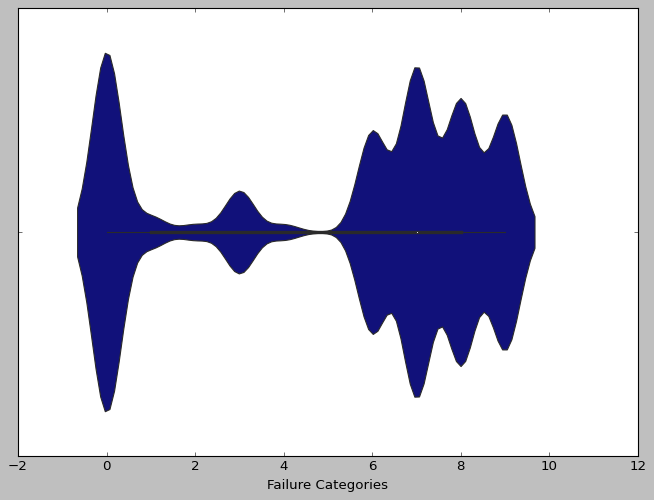

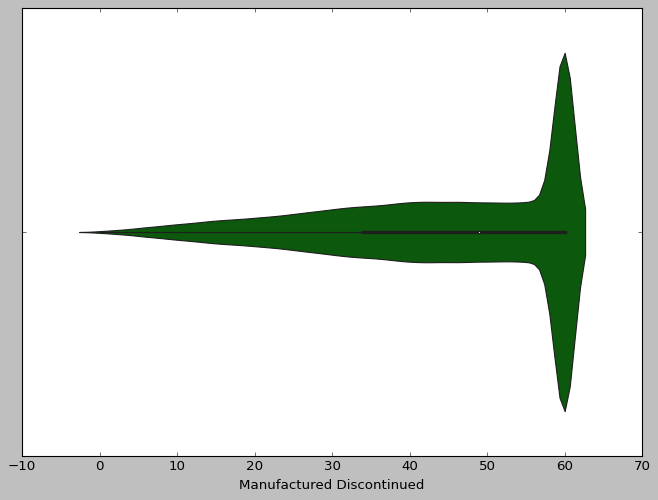

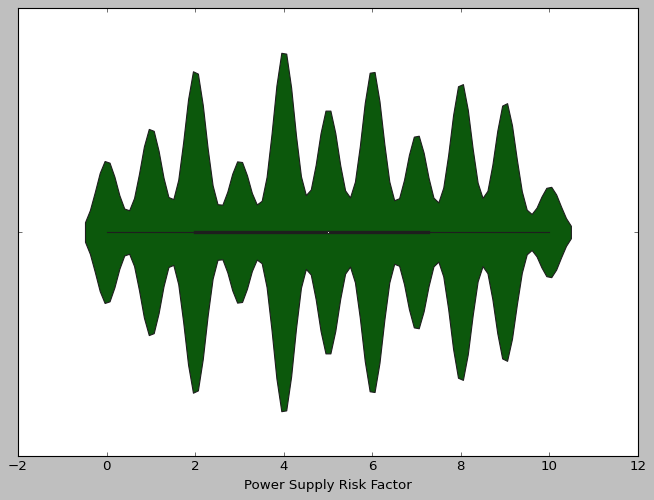

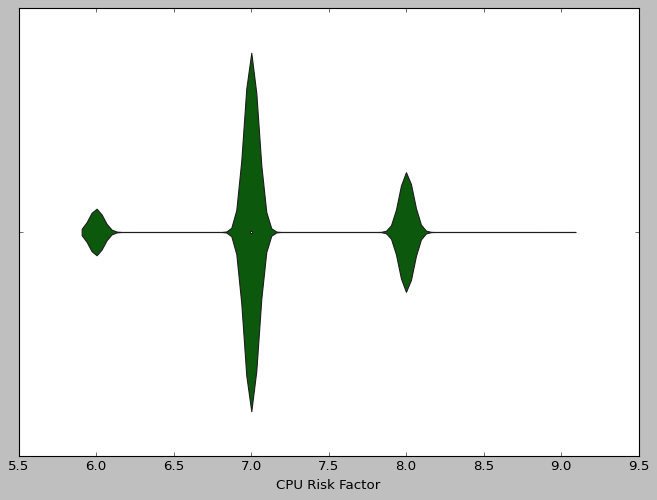

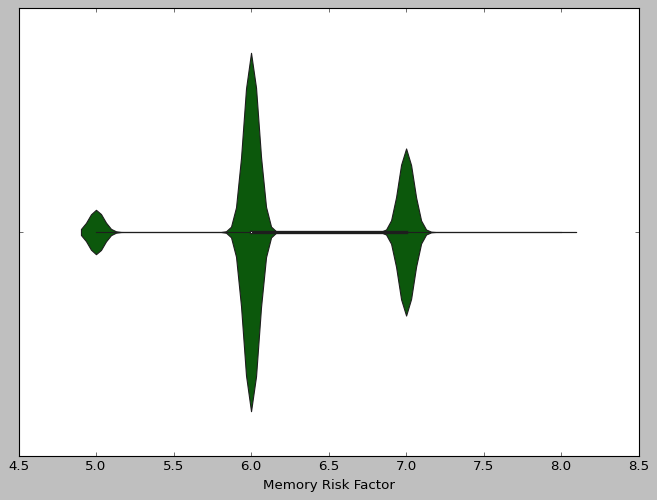

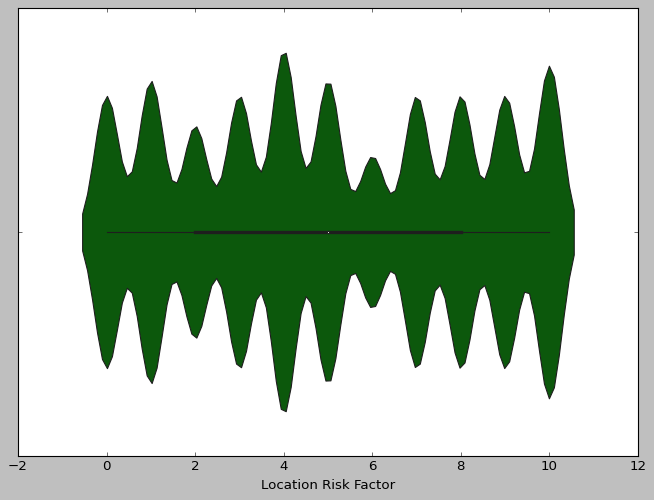

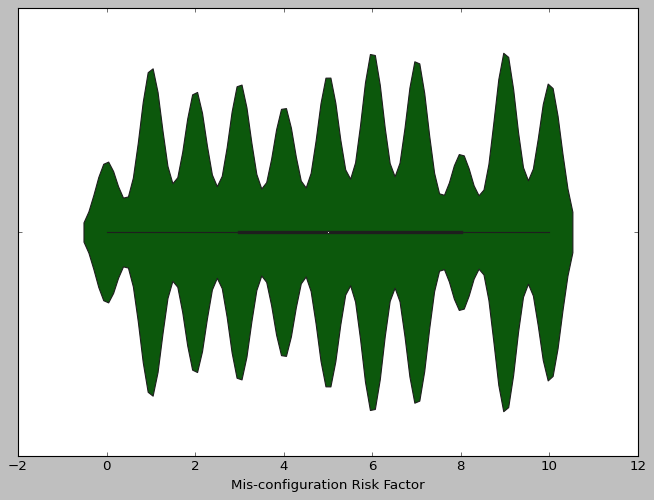

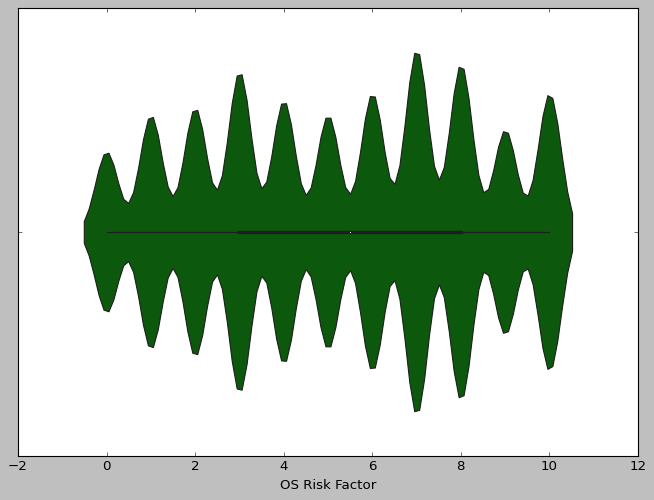

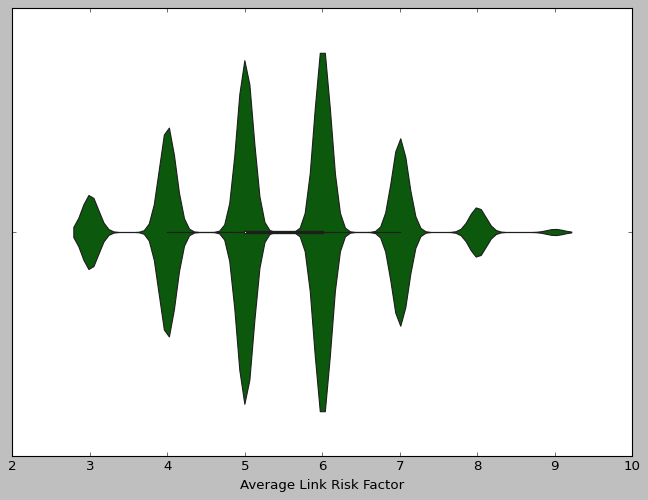

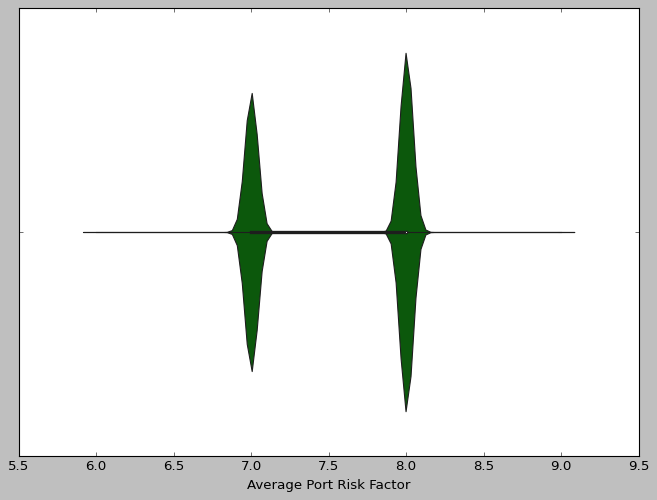

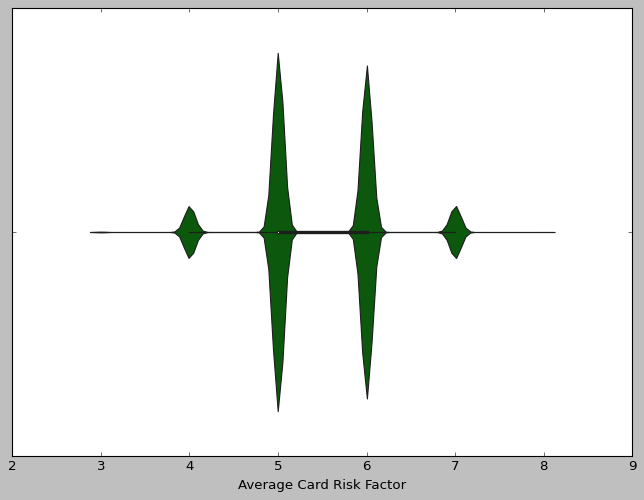

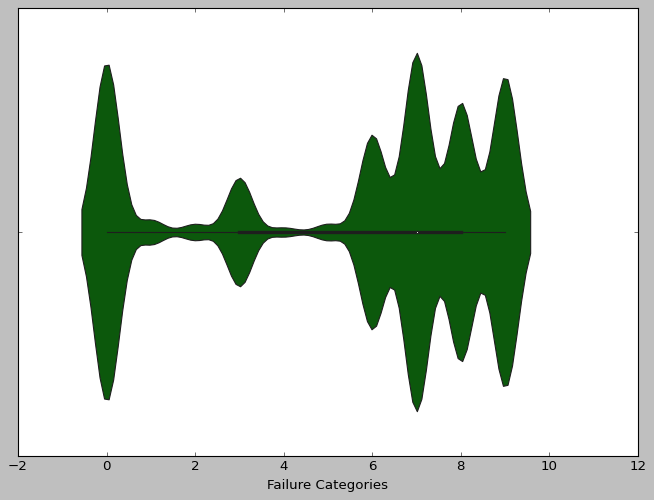

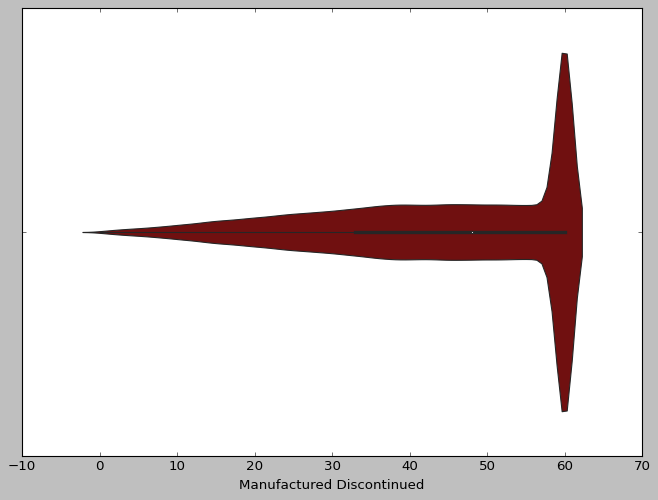

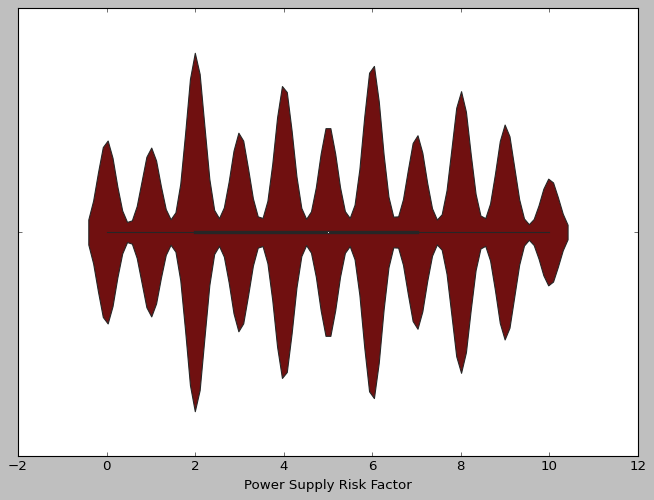

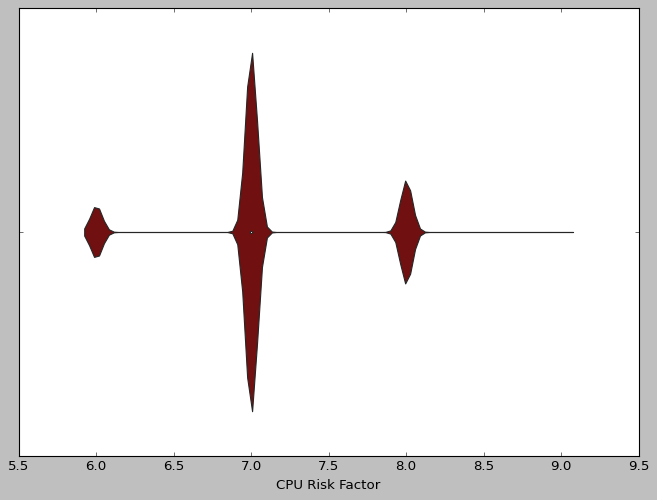

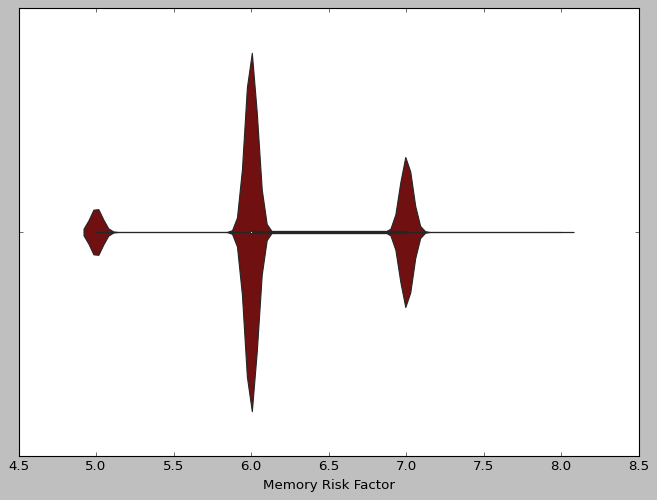

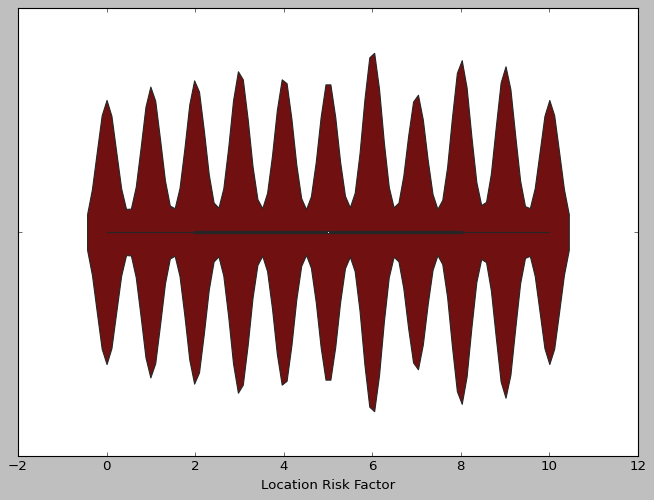

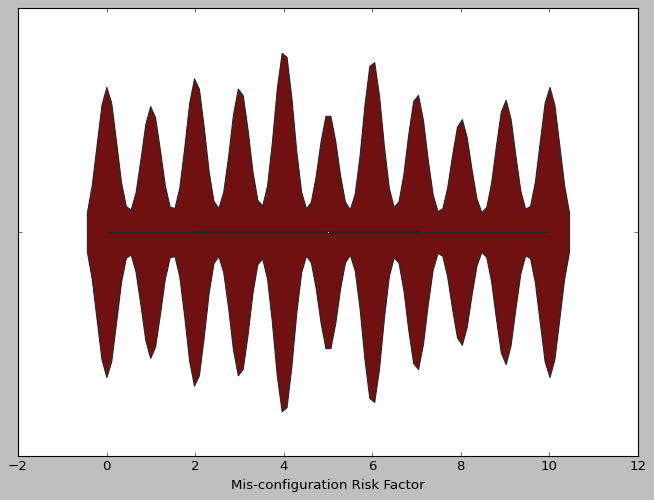

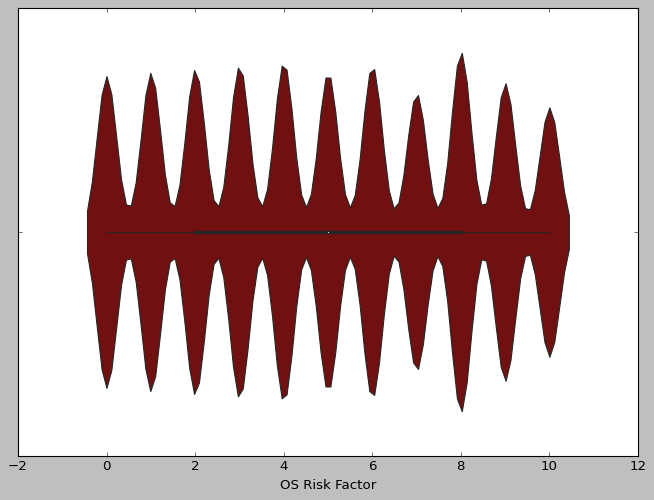

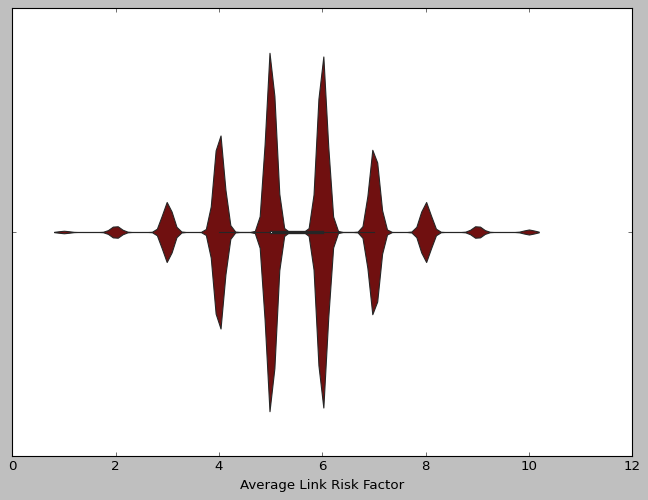

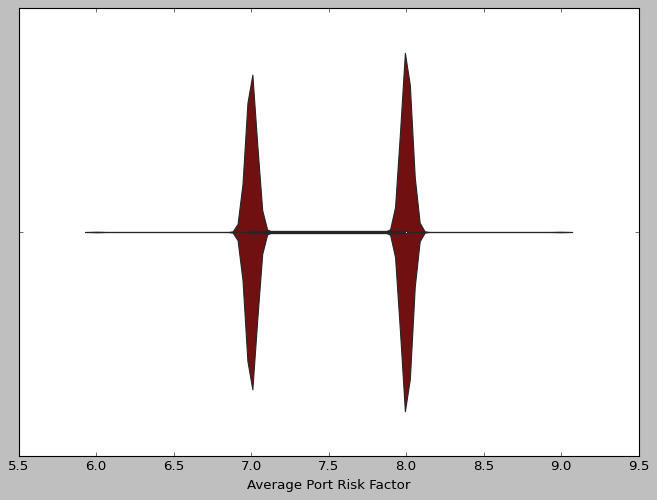

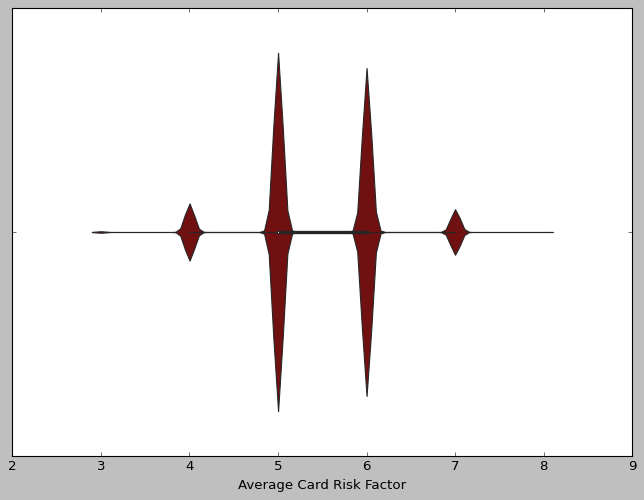

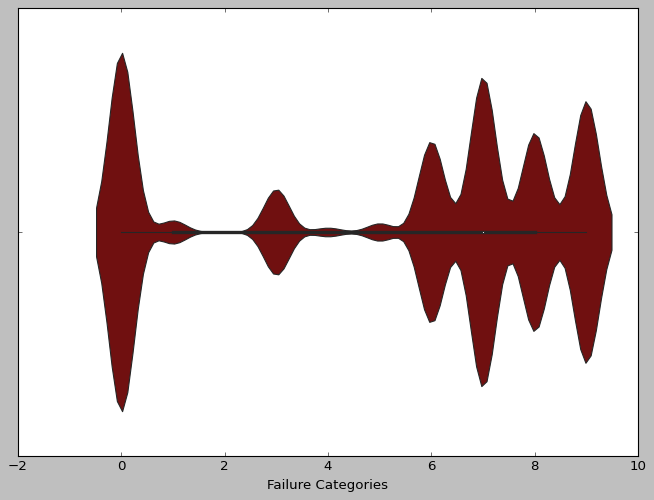

In [13]:
plot_violine(c_small, "darkblue", "small_violin")
plot_violine(c_medium, "darkgreen", "medium_violin")
plot_violine(c_large, "maroon", "large_violin")

In [12]:
def heatmap_plot(df, filename, title):
    colormap = plt.cm.Blues
    plt.figure(figsize=(20,20))
    plt.title(title, y=1.05, size=15)
    sns.heatmap(df.corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
        
    plt.savefig(filename)

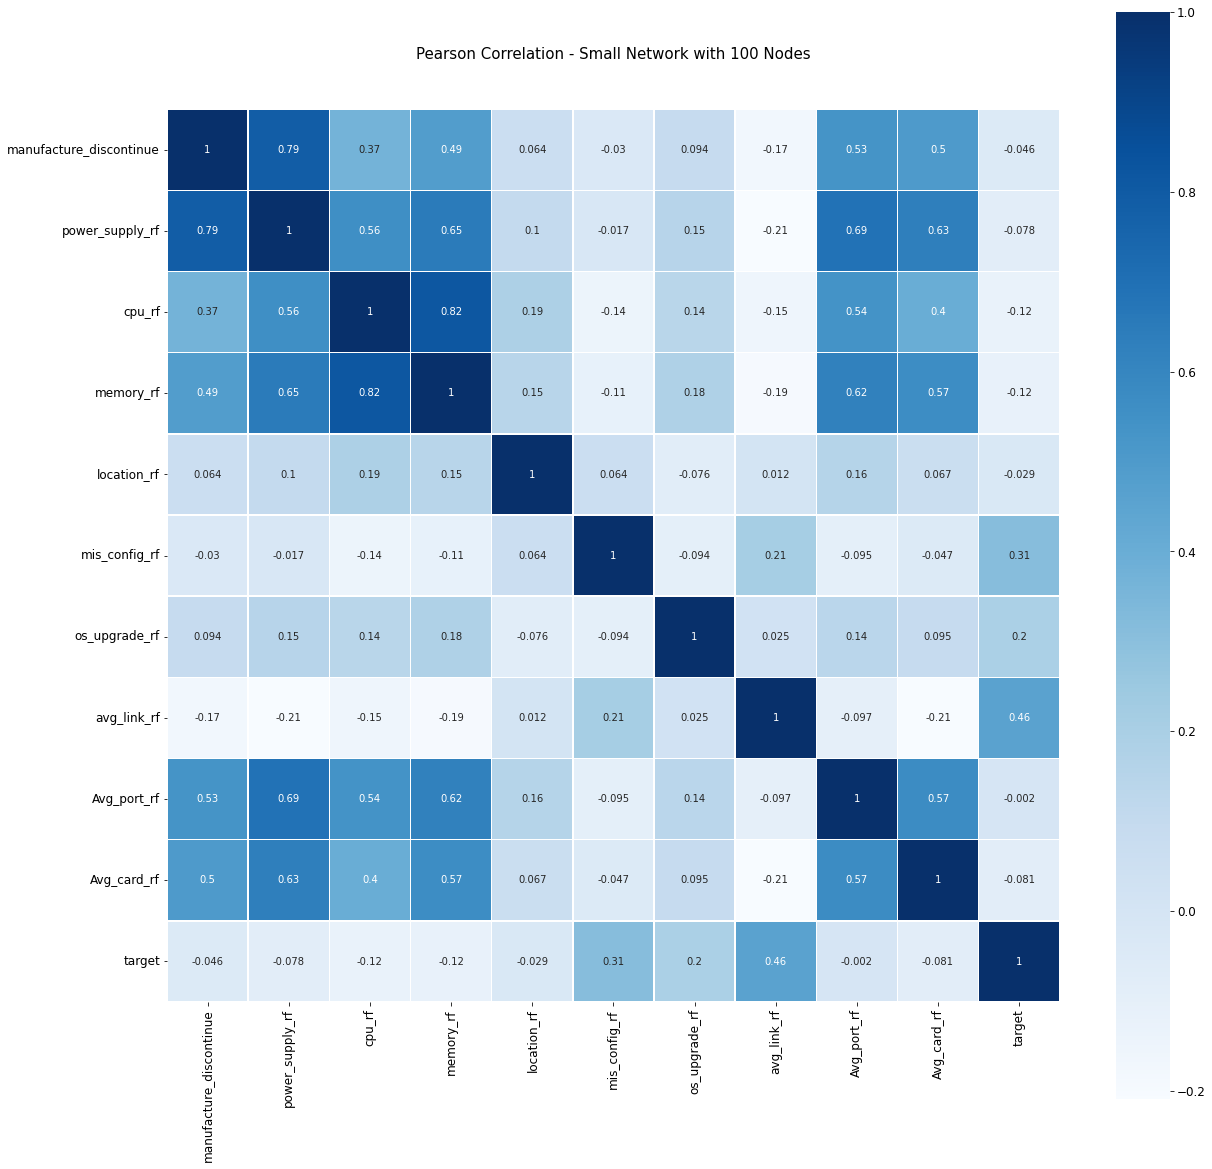

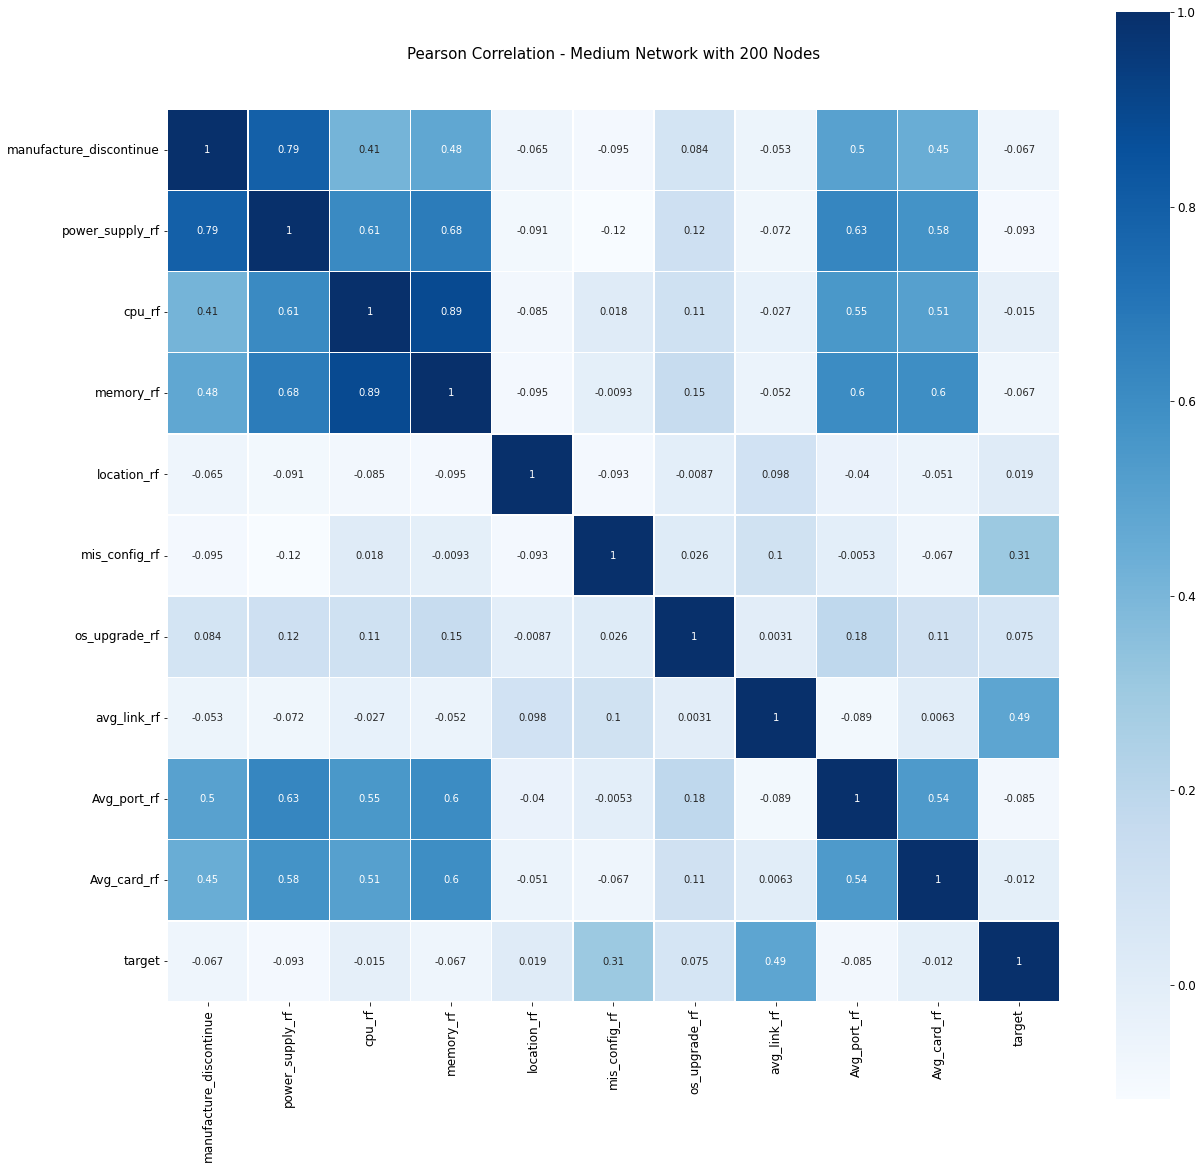

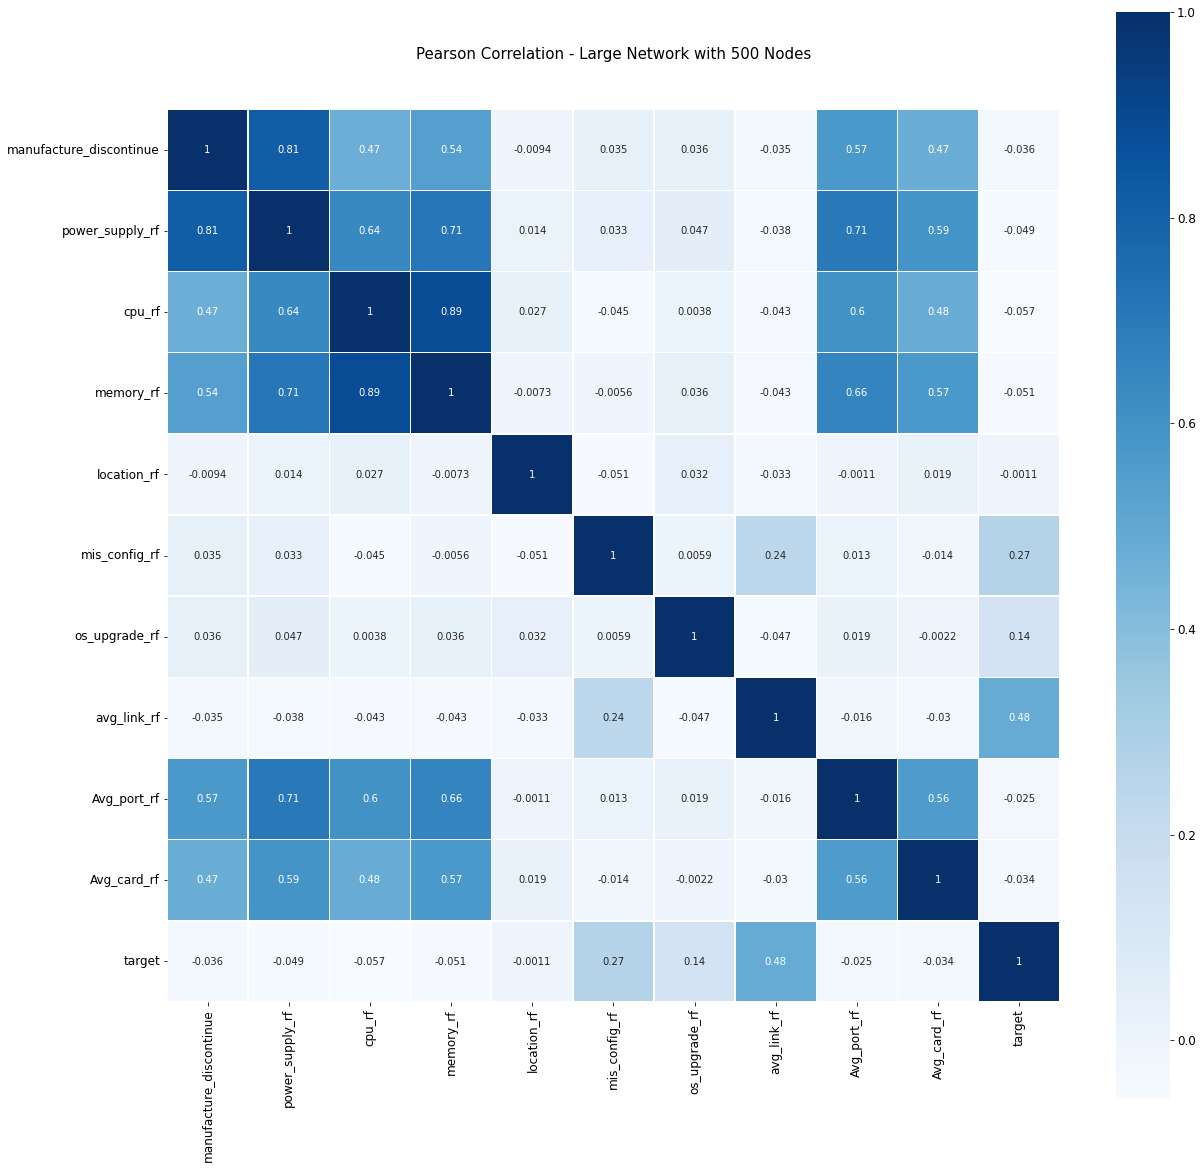

In [13]:
heatmap_plot(c_small, "small_heatmap.png", "Pearson Correlation - Small Network with 100 Nodes")
heatmap_plot(c_medium, "medium_heatmap.png", "Pearson Correlation - Medium Network with 200 Nodes")
heatmap_plot(c_large, "large_heatmap.png", "Pearson Correlation - Large Network with 500 Nodes")

In [16]:
# Plotting manufactured discontinued histogram

def histogram(df, c, filename):
    
    style.use('classic')
    plt.figure(figsize = (10,7))


    plt.hist(df["manufacture_discontinue"], color = c, bins =60)

#     plt.xticks(df1[column].value_counts().index.tolist())
    plt.xlabel(column_name[0])

#     values = np.arange(0, max(list(df1[column].value_counts())) + (max(list(df1[column].value_counts()))/yt_o), yt)
#     plt.yticks(values, ['%d' % val for val in values])
#     plt.ylabel("Value Count")


    plt.tight_layout()
#     plt.legend(loc = 'best')
    
#     plt.savefig(filename)
        

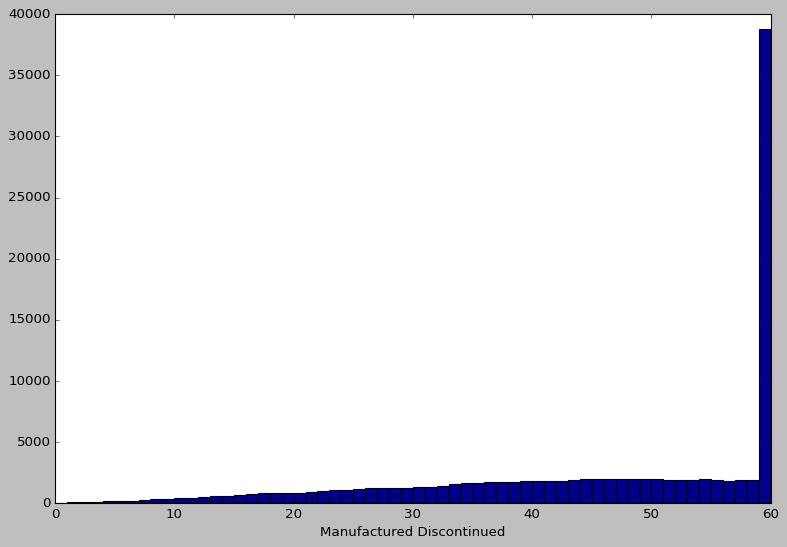

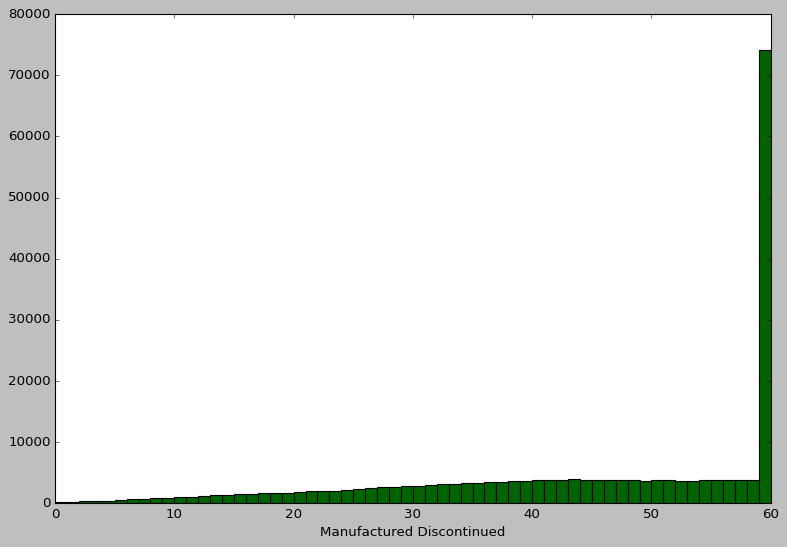

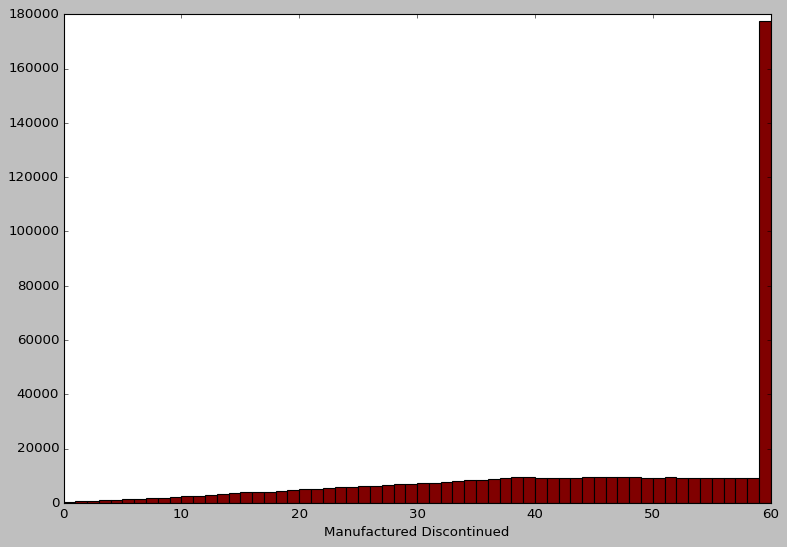

In [17]:
histogram(c_small, 'darkblue', "small_manufacture_hist.png")
histogram(c_medium, 'darkgreen', "medium_manufacture_hist.png")
histogram(c_large, 'maroon', "large_manufacture_hist.png")

In [18]:
c_small["manufacture_discontinue"].value_counts()

60    36834
47     1994
48     1994
49     1991
50     1966
46     1966
45     1963
59     1960
54     1935
44     1935
53     1907
52     1907
51     1885
43     1879
55     1860
58     1854
57     1848
56     1826
42     1823
41     1792
40     1770
39     1767
38     1736
37     1708
36     1680
35     1624
34     1624
33     1540
32     1428
31     1344
30     1316
29     1232
28     1232
27     1232
26     1204
25     1120
24     1092
23     1064
22      952
21      868
20      840
19      840
18      784
17      784
16      728
15      616
14      588
13      560
12      532
11      448
10      392
9       364
8       308
7       252
6       196
5       168
4       140
3       112
2        84
1        84
0        28
Name: manufacture_discontinue, dtype: int64

In [19]:
np.random.randint(0, 60)

42